# GPR to predict the number of atoms
## input spectra, for predict Cu,Te seperately and predict them both 
## input 1st and/or 2nd derivative data to predict Cu,Te together
### summary: for individual predict, spectra better predict Te, derivate better predict Cu; If predict Cu and Te together, using first derivative data will give the best result. 

In [26]:
ls

 磁碟區 C 中的磁碟沒有標籤。
 磁碟區序號:  B648-F79B

 C:\Users\Yu-Hsuan Hsiao\XANES_Capstone\examples 的目錄

2020/06/11  下午 03:17    <DIR>          .
2020/06/11  下午 03:17    <DIR>          ..
2020/06/11  下午 03:17    <DIR>          .ipynb_checkpoints
2020/06/11  下午 02:38                 0 __ init __.py
2020/06/11  下午 02:38           179,563 add_noise_then_smooth.ipynb
2020/06/11  下午 02:38             1,860 central_copper_list.csv
2020/06/11  下午 02:38           221,858 Decision tree.ipynb
2020/06/11  下午 02:38           425,424 DecisionTree_predict_atom_number.ipynb
2020/06/11  下午 02:38        42,994,535 first_second_derivate_CN_10000average_spectra.csv
2020/06/11  下午 02:38            50,239 Fitting with Larch lib.ipynb
2020/05/07  上午 08:56    <DIR>          Gaussian Combination
2020/06/11  下午 02:38           173,468 GaussianProcessRegression_fitcurve.ipynb
2020/06/11  下午 03:17         1,245,153 GPR_predict_atom_number.ipynb
2020/06/11  下午 02:38    <DIR>          Larch
2020/06/11  下午 02:38           181,34

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('mu_cn10000.csv')
df

CN    Num Cu    Num Te       Mu1       Mu2       Mu3       Mu4  \
0      9.920706  5.641016  4.279690  0.030303  0.032757  0.035112  0.037475   
1      9.038954  4.685766  4.353189  0.031529  0.034154  0.036671  0.039203   
2      9.725820  5.599930  4.125890  0.030576  0.033095  0.035505  0.037921   
3      9.374672  5.139779  4.234893  0.030891  0.033427  0.035861  0.038308   
4      9.599938  5.271755  4.328182  0.031077  0.033681  0.036170  0.038665   
5      9.532384  5.028370  4.504014  0.030601  0.033068  0.035442  0.037834   
6      9.143018  4.468513  4.674505  0.031489  0.034139  0.036673  0.039218   
7      9.991363  5.746311  4.245052  0.030807  0.033405  0.035882  0.038357   
8      9.304599  4.701765  4.602833  0.031290  0.033952  0.036489  0.039028   
9      9.000000  4.067356  4.932644  0.030855  0.033388  0.035816  0.038259   
10     9.206071  4.447445  4.758626  0.030472  0.032939  0.035308  0.037692   
11     9.282228  4.718036  4.564192  0.030489  0.032947  0.035311  0.037691   
12     8.915382  4.605924  4.309458  0.031254  0.033781  0.036219  0.038684   
13     9.368994  4.962895  4.406099  0.030665  0.033137  0.035517  0.037914   
14     9.425827  4.981080  4.444748  0.031005  0.033576  0.036038  0.038510   
15     9.348152  4.625459  4.722693  0.031200  0.033831  0.036342  0.038858   
16     9.911599  5.774315  4.137285  0.030574  0.033078  0.035478  0.037888   
17    10.114656  5.547557  4.567099  0.030096  0.032515  0.034839  0.037174   
18     9.404202  4.692321  4.711881  0.030573  0.033071  0.035467  0.037874   
19     9.508251  4.874126  4.634125  0.030771  0.033321  0.035760  0.038206   
20     9.349478  5.064714  4.284765  0.030982  0.033524  0.035964  0.038419   
21     9.180554  4.582731  4.597823  0.031367  0.034012  0.036538  0.039071   
22    10.084130  5.722992  4.361138  0.030209  0.032682  0.035048  0.037417   
23    10.296021  5.930493  4.365528  0.030662  0.033261  0.035734  0.038202   
24     9.473216  4.979482  4.493735  0.030404  0.032835  0.035176  0.037535   
25     9.287136  4.897177  4.389959  0.030989  0.033526  0.035963  0.038416   
26     9.287641  4.828523  4.459118  0.030524  0.032950  0.035291  0.037655   
27     9.870775  5.413543  4.457232  0.030492  0.032980  0.035366  0.037761   
28     9.011194  4.134130  4.877064  0.031196  0.033782  0.036261  0.038753   
29     8.893955  4.351698  4.542257  0.031267  0.033817  0.036272  0.038750   
...         ...       ...       ...       ...       ...       ...       ...   
9970   9.574224  5.355966  4.218258  0.031015  0.033609  0.036088  0.038572   
9971   9.788726  5.346639  4.442086  0.030509  0.032989  0.035368  0.037760   
9972   9.426581  4.853162  4.573419  0.030343  0.032737  0.035048  0.037383   
9973   9.370232  4.695027  4.675204  0.030647  0.033149  0.035550  0.037965   
9974   9.754716  5.345189  4.409527  0.030702  0.033262  0.035707  0.038154   
9975   9.289750  4.568903  4.720847  0.030342  0.032755  0.035083  0.037431   
9976   8.890981  4.498058  4.392924  0.031142  0.033656  0.036081  0.038533   
9977   9.511874  5.304763  4.207111  0.031126  0.033747  0.036250  0.038757   
9978   8.919212  4.411527  4.507685  0.030975  0.033495  0.035919  0.038362   
9979   9.184963  4.470282  4.714681  0.031026  0.033591  0.036050  0.038522   
9980   9.344692  4.834125  4.510567  0.030947  0.033498  0.035942  0.038398   
9981   9.647390  5.454300  4.193090  0.030778  0.033290  0.035702  0.038127   
9982   8.942223  4.492496  4.449726  0.031071  0.033599  0.036033  0.038487   
9983  10.341775  6.130248  4.211527  0.030067  0.032484  0.034804  0.037134   
9984   9.686344  5.108324  4.578019  0.030674  0.033213  0.035642  0.038076   
9985   9.776649  5.302454  4.474195  0.030633  0.033167  0.035591  0.038021   
9986   9.700500  5.395680  4.304820  0.030634  0.033132  0.035529  0.037938   
9987   9.079877  4.875680  4.204197  0.031186  0.033739  0.036194  0.038670   
9988   9.091069  4.248448  4.842621  0.030831  0.033367  0.0357

use 500 random data to do the Machine Learning

In [3]:
df_test=df.sample(500)
df_test

CN    Num Cu    Num Te       Mu1       Mu2       Mu3       Mu4  \
7691   9.585513  5.163423  4.422090  0.030183  0.032579  0.034887  0.037214   
3956   9.112360  4.824409  4.287951  0.031202  0.033763  0.036224  0.038703   
7493  10.400217  6.284091  4.116126  0.030131  0.032577  0.034920  0.037267   
1289   9.819536  5.315932  4.503603  0.030549  0.033063  0.035470  0.037884   
916    9.855348  5.514840  4.340509  0.030297  0.032735  0.035079  0.037437   
7604   9.073249  4.728959  4.344291  0.030729  0.033184  0.035552  0.037944   
5501   9.259665  4.697777  4.561888  0.030566  0.033015  0.035374  0.037754   
3131   9.708330  5.304243  4.404087  0.030890  0.033461  0.035919  0.038384   
151    9.587314  5.215213  4.372101  0.030397  0.032820  0.035155  0.037510   
8183   9.816217  5.532696  4.283521  0.030835  0.033416  0.035880  0.038346   
8761   9.751895  5.610301  4.141593  0.030451  0.032869  0.035201  0.037553   
9568   9.910717  5.386034  4.524683  0.030753  0.033304  0.035743  0.038188   
9774   9.712269  5.550488  4.161781  0.030675  0.033172  0.035570  0.037982   
9111   9.447695  4.967628  4.480067  0.031075  0.033692  0.036189  0.038687   
6155   8.971077  4.394462  4.576616  0.031034  0.033552  0.035976  0.038423   
8549   9.537454  5.268338  4.269116  0.030763  0.033289  0.035711  0.038142   
927    9.655060  5.284936  4.370124  0.030810  0.033378  0.035832  0.038290   
4964   9.383972  5.009608  4.374363  0.030711  0.033164  0.035528  0.037915   
9921   9.124152  4.768475  4.355676  0.030606  0.033068  0.035438  0.037828   
3486   9.467594  4.870591  4.597002  0.030258  0.032691  0.035029  0.037382   
2447   9.168237  4.612511  4.555727  0.031023  0.033570  0.036014  0.038476   
8771   9.182986  4.456026  4.726960  0.030809  0.033346  0.035777  0.038219   
4250   9.562186  5.363156  4.199031  0.030682  0.033156  0.035537  0.037936   
2491   8.866754  4.263722  4.603032  0.030744  0.033161  0.035504  0.037880   
8068   9.825371  5.497189  4.328182  0.030577  0.033074  0.035467  0.037870   
1777   9.901875  5.661013  4.240862  0.030318  0.032789  0.035158  0.037533   
1649   9.525263  5.167898  4.357365  0.030663  0.033164  0.035564  0.037975   
5444  10.048206  5.908079  4.140127  0.030549  0.033084  0.035507  0.037932   
6310   9.645698  5.306965  4.338733  0.030749  0.033262  0.035673  0.038096   
2504   9.152842  4.545609  4.607234  0.031166  0.033726  0.036185  0.038662   
...         ...       ...       ...       ...       ...       ...       ...   
5677   9.582369  5.203811  4.378557  0.030552  0.033017  0.035388  0.037777   
1890   9.467716  4.884731  4.582985  0.030834  0.033386  0.035829  0.038280   
9311  10.834258  6.834258  4.000000  0.029702  0.032103  0.034400  0.036697   
7068   9.697888  5.171846  4.526041  0.030541  0.033033  0.035422  0.037823   
5944   9.604941  5.570598  4.034343  0.030900  0.033450  0.035892  0.038341   
3970   8.951323  4.951323  4.000000  0.031273  0.033806  0.036248  0.038717   
450   10.147288  6.147288  4.000000  0.030614  0.033174  0.035616  0.038056   
4460   9.215433  4.952014  4.263419  0.030732  0.033229  0.035628  0.038041   
8645  10.862536  6.844305  4.018232  0.029698  0.032110  0.034417  0.036723   
1703   9.353033  4.754418  4.598615  0.030482  0.032945  0.035312  0.037695   
416    9.674552  5.203570  4.470982  0.030566  0.033051  0.035436  0.037835   
254    9.413232  5.260082  4.153150  0.030974  0.033478  0.035888  0.038318   
2158   9.879891  5.879891  4.000000  0.030276  0.032639  0.034924  0.037232   
2071   9.805680  5.347826  4.457854  0.030543  0.033066  0.035478  0.037897   
5561   9.664184  4.996276  4.667908  0.030814  0.033372  0.035818  0.038270   
8585   9.716568  5.432933  4.283636  0.030828  0.033384  0.035829  0.038280   
1955  10.088138  5.715148  4.372990  0.030078  0.032536  0.034887  0.037241   
4269   9.095716  4.417494  4.678222  0.031339  0.033934  0.036421  0.038925   
5665  10.175742  6.175742  4.000000  0.031093  0.033750  0.0362

single output*(predict Num Cu)

In [4]:
from sklearn.model_selection import train_test_split
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
labels

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


array([5.16342329, 4.82440915, 6.28409127, 5.31593238, 5.51483973,
       4.72895861, 4.69777654, 5.30424299, 5.2152127 , 5.5326965 ,
       5.61030145, 5.38603435, 5.55048801, 4.96762813, 4.39446165,
       5.26833832, 5.28493612, 5.00960832, 4.76847518, 4.87059124,
       4.61251064, 4.45602593, 5.36315587, 4.26372178, 5.49718921,
       5.66101275, 5.16789809, 5.90807885, 5.30696542, 4.54560866,
       4.97532161, 5.77505631, 5.63199118, 5.31843039, 5.61940379,
       5.25642767, 5.26375103, 4.84774716, 6.08263421, 4.61627594,
       5.35232474, 4.52569599, 4.64090151, 4.48578169, 5.54514279,
       4.79693435, 4.68818138, 5.5398559 , 5.35951491, 5.35919772,
       5.919951  , 4.92253218, 4.76771237, 5.74160698, 4.86845591,
       5.04959696, 5.72557727, 4.58161507, 5.84572433, 5.8487015 ,
       4.84764187, 5.72476921, 5.83201181, 5.3486762 , 4.92350575,
       5.98218172, 4.47154535, 5.26857446, 5.9020507 , 4.93978495,
       5.0436525 , 5.17608997, 4.66530852, 6.31782204, 4.87994

In [5]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [6]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


In [7]:
# Import the model we are using
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

In [8]:
gpr = model.fit(train_features, train_labels)

In [9]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)

0.003788717843491167


In [10]:
print('R Squared Error from gpr score:',gpr.score(train_features, train_labels))

R Squared Error from gpr score: 0.9906504305151872


In [11]:
from sklearn.metrics import r2_score
print('R Squared Error:', r2_score(test_labels, pred_labels))

R Squared Error: 0.9874515367740966


predict only Num of Te

In [12]:
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
labels

The shape of our features is: (500, 100)
The shape of our labels is: (500,)


array([4.42208966, 4.28795066, 4.11612611, 4.50360339, 4.34050872,
       4.34429052, 4.5618881 , 4.40408725, 4.37210139, 4.28352065,
       4.1415934 , 4.52468283, 4.16178136, 4.48006737, 4.57661558,
       4.26911559, 4.3701239 , 4.37436346, 4.35567641, 4.59700238,
       4.55572672, 4.72696049, 4.1990306 , 4.60303178, 4.32818191,
       4.24086221, 4.35736475, 4.14012748, 4.33873266, 4.60723351,
       4.40604798, 4.07298019, 4.21167806, 4.19364543, 4.22470066,
       4.34942367, 4.57874966, 4.49906414, 4.00659062, 4.5957551 ,
       4.38903103, 4.824768  , 4.74868389, 4.64263062, 4.20459688,
       4.        , 4.26314165, 4.09159818, 4.24855136, 4.48245491,
       4.0848623 , 4.5593721 , 4.60923663, 4.28768109, 4.33801898,
       4.31430472, 4.17166183, 4.7114384 , 4.        , 4.197553  ,
       4.41925071, 4.16381867, 4.30731389, 4.10086622, 4.49240174,
       4.02336804, 4.62925886, 4.28431662, 4.04131404, 4.17207994,
       4.43976765, 4.03813459, 4.60575843, 4.        , 4.61367

In [13]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (375, 100)
Training Labels Shape: (375,)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125,)


In [14]:
gpr = model.fit(train_features, train_labels)

In [15]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)

0.00043379036918267264


In [16]:
from sklearn.metrics import r2_score
print('R Squared Error:', r2_score(test_labels, pred_labels))

R Squared Error: 0.9910212679656902


## From above, for individual prediction, by using spectra, the num of Te get higher R2

# use spectra predict Num of Cu, Te as multi target regression

In [17]:
# Multi target regression
features=np.array(df_test.loc[:,'Mu1':'Mu100'])
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 100)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 100)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 100)
Testing Labels Shape: (125, 2)


In [18]:
gpr = model.fit(train_features, train_labels)

In [19]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)

0.0025376547090820993


In [20]:
print('R Squared Error from gpr score for MTR:',gpr.score(train_features, train_labels))

R Squared Error from gpr score for MTR: 0.9887564960363748


In [21]:
from sklearn.metrics import r2_score
print('R Squared Error:', r2_score(test_labels, pred_labels))

R Squared Error: 0.9902701927798994


In [22]:
pred_labels

array([[4.94398002, 4.51116907],
       [6.26524991, 3.99611262],
       [5.11843943, 4.39222335],
       [5.62432767, 4.31412602],
       [6.2457707 , 4.16047836],
       [6.09963615, 4.12683324],
       [5.26822024, 4.31958764],
       [4.09329894, 4.94320648],
       [5.71220333, 4.08806712],
       [5.04028442, 4.31086248],
       [5.51491061, 4.2873568 ],
       [5.4207792 , 4.26154811],
       [4.37873519, 4.73811364],
       [5.11589379, 4.19827529],
       [5.68664283, 4.04453869],
       [5.08523797, 4.50312427],
       [5.77766002, 4.1603267 ],
       [5.01211622, 4.39321139],
       [6.52051712, 4.09437954],
       [5.03488285, 4.30770299],
       [5.56918188, 4.40294872],
       [6.29885425, 4.0653653 ],
       [5.1710451 , 4.48061567],
       [4.66384375, 4.00540419],
       [6.95636146, 3.98740218],
       [6.2845635 , 4.2283983 ],
       [4.96069794, 4.48321117],
       [5.51719474, 4.39091418],
       [5.04960089, 4.01267731],
       [6.0012299 , 4.02380383],
       [4.

from the above, we can see that if we use multi target regression, the predicted values are still reasonable.
In the following, I am trying to use 1st and/or 2nd derivate to predict the number of atoms by multi target regression.

generate a derivate dataframe from the test dataframe.

In [23]:
import sys
sys.path.append('../PredictXANES')
import xanes_derivatives

In [24]:
dmu1, dmu2 = xanes_derivatives.xanes_derivatives(df_test)

In [28]:
dmu1.shape

(500, 99)

In [29]:
# use first derivate only 
features=dmu1
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 99)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 99)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125, 2)


In [30]:
gpr = model.fit(train_features, train_labels)

In [31]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

0.0018035565532996927
R Squared Error: 0.9932167576033017


In [32]:
# use second derivate only 
features=dmu2
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

The shape of our features is: (500, 98)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 98)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125, 2)


In [33]:
gpr = model.fit(train_features, train_labels)

In [34]:
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

0.0028581088973248913
R Squared Error: 0.9891865080129987


# use first and second derivate together, multi target regressor implementing GPR

In [35]:
dmu_both = np.concatenate((dmu1,dmu2),axis=1)
print('The shape of first derivate is:', dmu1.shape)
print('The shape of second derivate is:', dmu2.shape)
print('The shape of the concatenate derivate is:', dmu_both.shape)

The shape of first derivate is: (500, 99)
The shape of second derivate is: (500, 98)
The shape of the concatenate derivate is: (500, 197)


In [36]:
# use first and second derivate together
features=dmu_both
labels = np.array(df_test.loc[:,'Num Cu':'Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 197)
The shape of our labels is: (500, 2)
Training Features Shape: (375, 197)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 197)
Testing Labels Shape: (125, 2)
0.0018769582850310866
R Squared Error: 0.992937860039718


# use first and/or derivative to predict num of Cu, Te seperatly 

In [37]:
# use first derivate to predict Cu 
features=dmu1
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)
0.002310836012413187
R Squared Error: 0.9923463710097398


### From above, we can see that the R2 is less than using multi targert regression

In [38]:
# use first derivate to predict Te
features=dmu1
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 99)
The shape of our labels is: (500,)
Training Features Shape: (375, 99)
Training Labels Shape: (375,)
Testing Features Shape: (125, 99)
Testing Labels Shape: (125,)
0.0005377411448210405
R Squared Error: 0.988869661508926


## Compare with spectra, which Te has higher R2, dmu1 will give Cu higher R2

# The follwing is using second derivate to predict Cu,Te seperately

In [39]:
# use second derivate to predict Cu
features=dmu2
labels = np.array(df_test['Num Cu'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 98)
The shape of our labels is: (500,)
Training Features Shape: (375, 98)
Training Labels Shape: (375,)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125,)
0.0034153945877926444
R Squared Error: 0.988688006033362


In [40]:
# use second derivate to predict Te
features=dmu2
labels = np.array(df_test['Num Te'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
gpr = model.fit(train_features, train_labels)
params = model.kernel_.get_params()
pred_labels, std = model.predict(test_features, return_std=True)
MSE = ((pred_labels-test_labels)**2).mean()
print(MSE)
print('R Squared Error:', r2_score(test_labels, pred_labels))

The shape of our features is: (500, 98)
The shape of our labels is: (500,)
Training Features Shape: (375, 98)
Training Labels Shape: (375,)
Testing Features Shape: (125, 98)
Testing Labels Shape: (125,)
0.0006045337879488165
R Squared Error: 0.9874871659831781


## Compared with spectra and first derivate, using second derivative data, both R2 for  Cu, Te are lower. Still the Cu has higher R2 compared with Te

# Add nosie to the avergaed data

In [41]:
df = pd.read_csv('mu_cn10000.csv')
df

CN    Num Cu    Num Te       Mu1       Mu2       Mu3       Mu4  \
0      9.920706  5.641016  4.279690  0.030303  0.032757  0.035112  0.037475   
1      9.038954  4.685766  4.353189  0.031529  0.034154  0.036671  0.039203   
2      9.725820  5.599930  4.125890  0.030576  0.033095  0.035505  0.037921   
3      9.374672  5.139779  4.234893  0.030891  0.033427  0.035861  0.038308   
4      9.599938  5.271755  4.328182  0.031077  0.033681  0.036170  0.038665   
5      9.532384  5.028370  4.504014  0.030601  0.033068  0.035442  0.037834   
6      9.143018  4.468513  4.674505  0.031489  0.034139  0.036673  0.039218   
7      9.991363  5.746311  4.245052  0.030807  0.033405  0.035882  0.038357   
8      9.304599  4.701765  4.602833  0.031290  0.033952  0.036489  0.039028   
9      9.000000  4.067356  4.932644  0.030855  0.033388  0.035816  0.038259   
10     9.206071  4.447445  4.758626  0.030472  0.032939  0.035308  0.037692   
11     9.282228  4.718036  4.564192  0.030489  0.032947  0.035311  0.037691   
12     8.915382  4.605924  4.309458  0.031254  0.033781  0.036219  0.038684   
13     9.368994  4.962895  4.406099  0.030665  0.033137  0.035517  0.037914   
14     9.425827  4.981080  4.444748  0.031005  0.033576  0.036038  0.038510   
15     9.348152  4.625459  4.722693  0.031200  0.033831  0.036342  0.038858   
16     9.911599  5.774315  4.137285  0.030574  0.033078  0.035478  0.037888   
17    10.114656  5.547557  4.567099  0.030096  0.032515  0.034839  0.037174   
18     9.404202  4.692321  4.711881  0.030573  0.033071  0.035467  0.037874   
19     9.508251  4.874126  4.634125  0.030771  0.033321  0.035760  0.038206   
20     9.349478  5.064714  4.284765  0.030982  0.033524  0.035964  0.038419   
21     9.180554  4.582731  4.597823  0.031367  0.034012  0.036538  0.039071   
22    10.084130  5.722992  4.361138  0.030209  0.032682  0.035048  0.037417   
23    10.296021  5.930493  4.365528  0.030662  0.033261  0.035734  0.038202   
24     9.473216  4.979482  4.493735  0.030404  0.032835  0.035176  0.037535   
25     9.287136  4.897177  4.389959  0.030989  0.033526  0.035963  0.038416   
26     9.287641  4.828523  4.459118  0.030524  0.032950  0.035291  0.037655   
27     9.870775  5.413543  4.457232  0.030492  0.032980  0.035366  0.037761   
28     9.011194  4.134130  4.877064  0.031196  0.033782  0.036261  0.038753   
29     8.893955  4.351698  4.542257  0.031267  0.033817  0.036272  0.038750   
...         ...       ...       ...       ...       ...       ...       ...   
9970   9.574224  5.355966  4.218258  0.031015  0.033609  0.036088  0.038572   
9971   9.788726  5.346639  4.442086  0.030509  0.032989  0.035368  0.037760   
9972   9.426581  4.853162  4.573419  0.030343  0.032737  0.035048  0.037383   
9973   9.370232  4.695027  4.675204  0.030647  0.033149  0.035550  0.037965   
9974   9.754716  5.345189  4.409527  0.030702  0.033262  0.035707  0.038154   
9975   9.289750  4.568903  4.720847  0.030342  0.032755  0.035083  0.037431   
9976   8.890981  4.498058  4.392924  0.031142  0.033656  0.036081  0.038533   
9977   9.511874  5.304763  4.207111  0.031126  0.033747  0.036250  0.038757   
9978   8.919212  4.411527  4.507685  0.030975  0.033495  0.035919  0.038362   
9979   9.184963  4.470282  4.714681  0.031026  0.033591  0.036050  0.038522   
9980   9.344692  4.834125  4.510567  0.030947  0.033498  0.035942  0.038398   
9981   9.647390  5.454300  4.193090  0.030778  0.033290  0.035702  0.038127   
9982   8.942223  4.492496  4.449726  0.031071  0.033599  0.036033  0.038487   
9983  10.341775  6.130248  4.211527  0.030067  0.032484  0.034804  0.037134   
9984   9.686344  5.108324  4.578019  0.030674  0.033213  0.035642  0.038076   
9985   9.776649  5.302454  4.474195  0.030633  0.033167  0.035591  0.038021   
9986   9.700500  5.395680  4.304820  0.030634  0.033132  0.035529  0.037938   
9987   9.079877  4.875680  4.204197  0.031186  0.033739  0.036194  0.038670   
9988   9.091069  4.248448  4.842621  0.030831  0.033367  0.0357

In [42]:
from sklearn.model_selection import train_test_split
features=np.array(df.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df['CN'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)
labels

The shape of our features is: (10000, 100)
The shape of our labels is: (10000,)


array([ 9.9207061 ,  9.03895408,  9.72581986, ..., 10.18122819,
       10.15625981,  9.68443106])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


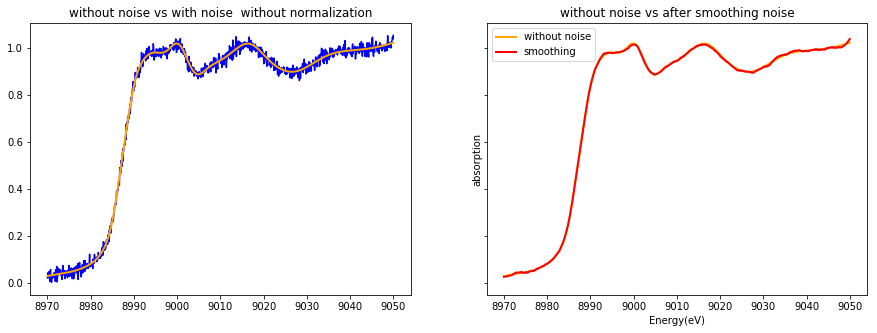

In [43]:
xs = np.linspace(8970, 9050, 1000)
energies = np.linspace(8970, 9050, 100)
s1 = UnivariateSpline(energies, features[0], s=0)
y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
noise = np.random.normal(0,0.015,1000)
y2= y1+ noise
ysmooth = savgol_filter(y2, 51, 2)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5), sharex = True, sharey = True)
ax1.plot(xs,y2,color = 'blue', label='with noise' )#noise
ax1.plot(xs,y1,color = 'orange' ,label='without noise', linewidth=2 )# without noise
ax2.plot(xs,y1,color = 'orange', label='without noise', linewidth=2)# without noise
ax2.plot(xs,ysmooth, color='red',label='smoothing', linewidth=2)#smooth
ax1.set_title('without noise vs with noise  without normalization')
ax2.set_title('without noise vs after smoothing noise')
plt.xlabel('Energy(eV)')
plt.ylabel('absorption')
plt.legend()
plt.show()

In [44]:
ysmooth.shape

(1000,)

The above spectrum is a example with noise 

## 1. create noise for all the 10000 sample
## 2. use specta with noise to get the 1 & 2 derivate 
## 3. use spectra with all energy-mu points 
## 4. use 1&2 derivate to predict CN 


In [45]:
def GPR_get_CN(features, labels):
    #parameter: features, labels
    # Using Skicit-learn to split data into training and testing sets
    from sklearn.model_selection import train_test_split
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    # Import the model we are using
    import sklearn.gaussian_process as gp
    kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
    model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    gpr = model.fit(train_features, train_labels)
    params = model.kernel_.get_params()
    pred_labels, std = model.predict(test_features, return_std=True)
    MSE = ((pred_labels-test_labels)**2).mean()
    print(MSE)
    from sklearn.metrics import r2_score
    print('R Squared Error:', r2_score(test_labels, pred_labels))

In [46]:
def add_noise_to_averaged_spectra_df_return_smooth(df):
    '''
    pre: df should have columns named "Mu1" to "Mu100"
    add noise to the spectra, np.random.normal(0,0.015,1000)
    ysmooth = savgol_filter(y2, 51, 2)
    post:return the np.array, each spectra after smooth mu value; 
    '''
    if 'Mu1' in df.columns:
        features=np.array(df.loc[:,'Mu1':'Mu100'])
    else:
        features=np.array(df)
            
    xs = np.linspace(8970, 9050, 1000)
    energies = np.linspace(8970, 9050, 100)
    smooth=np.array([])
    for i in range(features.shape[0]):
        s1 = UnivariateSpline(energies, features[i], s=0)
        y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
        noise = np.random.normal(0,0.015,1000)
        y2 = y1+ noise
        ysmooth = savgol_filter(y2, 51, 2)
        smooth = np.concatenate((smooth,ysmooth),axis=0)
        
    # return the smooth spectra np.array
    after_smooth=smooth.reshape(len(df.index),1000)
    return after_smooth

In [47]:
#use first 500 data
after_smooth_10000=add_noise_to_averaged_spectra_df_return_smooth(df[:500])

In [48]:
after_smooth_10000.shape

(500, 1000)

In [49]:
GPR_get_CN(features = after_smooth_10000, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.018627575145542908
R Squared Error: 0.9225330271672565


In [50]:
GPR_get_CN(features = after_smooth_10000, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.02102860140922009
R Squared Error: 0.9438974191867224


In [51]:
GPR_get_CN(features = after_smooth_10000, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.0009267647862687703
R Squared Error: 0.979363499590167


In [52]:
GPR_get_CN(features = after_smooth_10000, labels = np.array(df[:500].loc[:,'Num Cu':'Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125, 2)
0.011889858335870937
R Squared Error: 0.9620766279541167


In [53]:
import numpy as np


def xanes_derivatives(mu_df, dx=0.80808080808):
    '''
    This function calculates and returns the first and second derivative of a series of XANES spectra.
    Inputs:
        mu_df = Pandas dataframe of averaged XANES spectra absorption values.
        dx = distance between uniformly distributed energy values in XANES spectra. Defaulted to value provided in data.
    '''
    for nums in range(len(mu_df)):
        if nums == 0:
            pass

    dmu1 = np.zeros([len(mu_df), len(mu_df.columns)])
    dmu2 = np.zeros([len(mu_df), len(mu_df.columns)])

    for i in range(len(mu_df)):
        for j in range(len(mu_df.columns)):
            if j == len(mu_df.columns)-1:
                pass
            else:
                dmu1[i, j] = (mu_df.iloc[i, j+1] - mu_df.iloc[i, j]) / dx

    for i_ in range(len(mu_df)):
        for j_ in range(len(mu_df.columns)):
            if j_ == len(mu_df.columns)-1:
                pass
            else:
                dmu2[i_, j_] = (dmu1[i_, j_+1] - dmu1[i_, j_]) / dx

    return dmu1, dmu2

In [54]:
after_smooth_first500=pd.DataFrame(after_smooth_10000)
after_smooth_first500

0         1         2         3         4         5         6    \
0    0.043428  0.042860  0.042313  0.041785  0.041277  0.040789  0.040322   
1    0.032413  0.032308  0.032221  0.032152  0.032100  0.032067  0.032052   
2    0.034146  0.033874  0.033623  0.033394  0.033187  0.033000  0.032836   
3    0.022880  0.023967  0.025017  0.026032  0.027011  0.027955  0.028862   
4    0.022455  0.022969  0.023481  0.023992  0.024501  0.025009  0.025516   
5    0.029843  0.030331  0.030809  0.031277  0.031734  0.032182  0.032619   
6    0.038635  0.038214  0.037813  0.037432  0.037070  0.036729  0.036408   
7    0.033756  0.033561  0.033383  0.033224  0.033082  0.032959  0.032854   
8    0.032080  0.031899  0.031747  0.031625  0.031531  0.031467  0.031432   
9    0.025408  0.026044  0.026665  0.027271  0.027863  0.028440  0.029002   
10   0.032976  0.032865  0.032775  0.032706  0.032658  0.032631  0.032626   
11   0.041845  0.041406  0.040987  0.040587  0.040207  0.039847  0.039507   
12   0.024384  0.025566  0.026711  0.027819  0.028892  0.029928  0.030928   
13   0.018154  0.019301  0.020417  0.021502  0.022554  0.023576  0.024565   
14   0.033686  0.034179  0.034655  0.035113  0.035552  0.035974  0.036378   
15   0.020374  0.020879  0.021390  0.021906  0.022428  0.022956  0.023489   
16   0.028758  0.029356  0.029937  0.030502  0.031050  0.031583  0.032099   
17   0.032858  0.032940  0.033026  0.033117  0.033211  0.033309  0.033411   
18   0.019822  0.020876  0.021904  0.022905  0.023880  0.024829  0.025751   
19   0.032859  0.033392  0.033904  0.034394  0.034862  0.035309  0.035734   
20   0.033916  0.034424  0.034910  0.035373  0.035813  0.036229  0.036623   
21   0.035484  0.035418  0.035364  0.035322  0.035292  0.035275  0.035269   
22   0.022380  0.023306  0.024208  0.025086  0.025941  0.026772  0.027579   
23   0.032954  0.033272  0.033593  0.033917  0.034243  0.034573  0.034906   
24   0.047190  0.046301  0.045447  0.044628  0.043845  0.043096  0.042384   
25   0.027473  0.028242  0.028983  0.029694  0.030377  0.031031  0.031657   
26   0.030550  0.030595  0.030648  0.030710  0.030781  0.030860  0.030949   
27   0.038233  0.038009  0.037800  0.037606  0.037427  0.037263  0.037114   
28   0.039683  0.039120  0.038582  0.038070  0.037583  0.037122  0.036687   
29   0.039133  0.038538  0.037978  0.037452  0.036961  0.036504  0.036082   
..        ...       ...       ...       ...       ...       ...       ...   
470  0.028891  0.028890  0.028907  0.028943  0.028998  0.029070  0.029161   
471  0.023277  0.023838  0.024390  0.024933  0.025467  0.025993  0.026511   
472  0.035300  0.034756  0.034253  0.033790  0.033368  0.032986  0.032644   
473  0.024891  0.025330  0.025770  0.026211  0.026652  0.027094  0.027537   
474  0.021133  0.022229  0.023293  0.024325  0.025326  0.026296  0.027234   
475  0.030894  0.030715  0.030558  0.030422  0.030307  0.030212  0.030139   
476  0.040012  0.039016  0.038068  0.037171  0.036322  0.035522  0.034772   
477  0.032713  0.032999  0.033281  0.033558  0.033830  0.034097  0.034360   
478  0.039203  0.039279  0.039347  0.039408  0.039460  0.039504  0.039540   
479  0.027128  0.027513  0.027892  0.028266  0.028634  0.028997  0.029354   
480  0.025632  0.026364  0.027075  0.027766  0.028435  0.029084  0.029712   
481  0.028697  0.029436  0.030153  0.030848  0.031521  0.032172  0.032801   
482  0.023272  0.024197  0.025098  0.025972  0.026821  0.027644  0.028442   
483  0.047821  0.046999  0.046207  0.045443  0.044708  0.044002  0.043325   
484  0.026059  0.026332  0.026613  0.026904  0.027203  0.027512  0.027830   
485  0.030009  0.030489  0.030966  0.031438  0.031907  0.032372  0.032833   
486  0.023713  0.024432  0.025137  0.025828  0.026504  0.027166  0.027813   
487  0.032500  0.032006  0.031546  0.031119  0.030725  0.030363  0.030035   
488  0.020663  0.021527  0.022376  0.023210  0.024028  0.024831  0.025619   
489  0.047290  0.045825  0.044422  0.043081  0.041802  0.040586  0.039431   
490  0

In [55]:
dmu1, dmu2 =xanes_derivatives(after_smooth_first500)
dmu1.shape

(500, 1000)

In [56]:
#use 1&2 derivate to predict CN
dmu_both = np.concatenate((dmu1,dmu2),axis=1)

In [57]:
GPR_get_CN(features = dmu_both, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 2000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 2000)
Testing Labels Shape: (125,)
0.14594240604557543
R Squared Error: 0.39306558604956265


In [58]:
GPR_get_CN(features = dmu_both, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 2000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 2000)
Testing Labels Shape: (125,)
0.1423234826010831
R Squared Error: 0.6202926419655546


In [59]:
GPR_get_CN(features = dmu_both, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 2000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 2000)
Testing Labels Shape: (125,)
0.014038925375621365
R Squared Error: 0.6873917809997521


In [60]:
GPR_get_CN(features = dmu_both, labels = np.array(df[:500].loc[:,'Num Cu':'Num Te']))

Training Features Shape: (375, 2000)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 2000)
Testing Labels Shape: (125, 2)
0.07888829836063237
R Squared Error: 0.7289745542258288


In [61]:
GPR_get_CN(features = dmu1, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.11449540318130626
R Squared Error: 0.5238450405691942


In [62]:
GPR_get_CN(features = dmu1, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.10510235970793749
R Squared Error: 0.7195955396921745


In [63]:
GPR_get_CN(features = dmu1, labels = np.array(df[:500].loc[:,'Num Cu':'Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125, 2)
0.05901467032773093
R Squared Error: 0.815459944278021


In [64]:
GPR_get_CN(features = dmu1, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.005913935539617387
R Squared Error: 0.8683129365775808


In [65]:
GPR_get_CN(features = dmu2, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.2406170512600253
R Squared Error: -0.0006602806546869289


In [66]:
GPR_get_CN(features = dmu2, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.3749870580887546
R Squared Error: -0.0004346613909134156


In [67]:
GPR_get_CN(features = dmu2, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.04490900920201199
R Squared Error: -5.759237531322015e-10


In [68]:
GPR_get_CN(features = dmu2, labels = np.array(df[:500].loc[:,'Num Cu':'Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375, 2)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125, 2)
0.20994657361892755
R Squared Error: -0.0002165946716791156


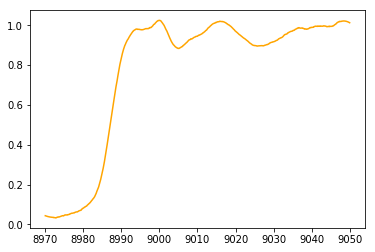

In [69]:
plt.plot(xs,after_smooth_10000[0],color = 'orange')

Text(0.5, 1.0, 'first derivate after smoothing original spectra')

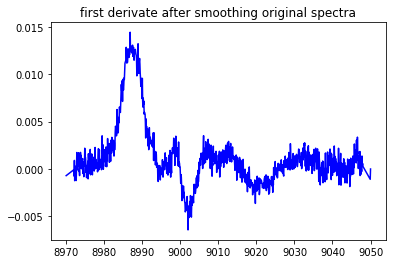

In [70]:
plt.plot(xs,dmu1[0],color = 'blue')
plt.title('first derivate after smoothing original spectra')

In [71]:
dmu1_withoutNoise, dmu2_withoutNoise =xanes_derivatives(df[:500].loc[:,'Mu1':'Mu100'])

In [72]:
dmu1_withoutNoise[0].shape

(100,)

(0.1, 0.125)

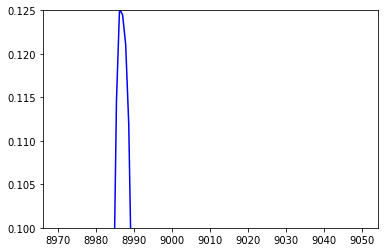

In [73]:
plt.plot(np.linspace(8970, 9050, 100),dmu1_withoutNoise[0],color = 'blue')
plt.ylim((0.1,0.125))

In [74]:
dmu1_Noise, dmu2_Noise =xanes_derivatives(pd.DataFrame(after_smooth_10000[300]))

(0.8, 1)

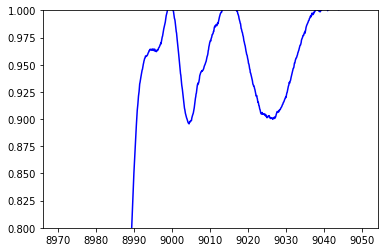

In [75]:
plt.plot(np.linspace(8970, 9050, 1000),after_smooth_10000[300],color = 'blue')
plt.ylim((0.8,1))

In [76]:
def normalization_spectra(df):
    '''
    use a raw spectra as parameter and return the after normalization spectra(np.array)
    all of the data are dividede by the highest absorption
    reurn 100 data point
    '''
    features=np.array(df.loc[:,'Mu1':'Mu100'])
    normalization_features = np.array([[0.0]*(np.size(features, 1))]*(np.size(features, 0)))
    for i in range(len(features)):
        max_absorption = np.amax(features[i])
        j = 0
        for absorption in features[i]:
            normlization_absoprtion = absorption/max_absorption
            normalization_features[i][j]=normlization_absoprtion
            j=j+1
    return normalization_features

In [77]:
normalization_spectra_first_500 = normalization_spectra(df[:500])

Text(0.5, 1.0, 'after normalize without noise')

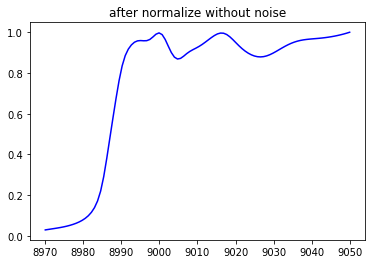

In [78]:
plt.plot(np.linspace(8970, 9050, 100),normalization_spectra_first_500[0],color = 'blue')
plt.title('after normalize without noise')

In [116]:
normalization_spectra_first_500_df = pd.DataFrame(normalization_spectra_first_500)

In [201]:
normalization_spectra_first_500_df.shape

(500, 100)

In [80]:
after_normalize_add_noise_smooth1000=add_noise_to_averaged_spectra_df_return_smooth(normalization_spectra_first_500_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [202]:
after_normalize_add_noise_smooth1000.shape

(500, 1000)

In [84]:
def one_demension_get_N_evenly_spaced_elements(arr, numElems):
    '''
    return nd.array
    '''
    idx = np.round(np.linspace(0, len(arr) - 1, numElems)).astype(int)
    return arr[idx]

0.9999165630679236


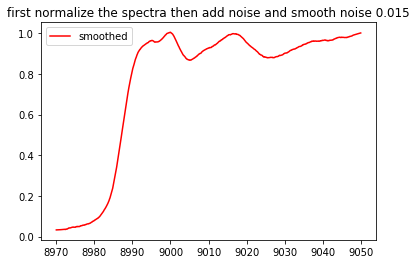

In [118]:
plt.plot(np.linspace(8970, 9050, 1000),after_normalize_add_noise_smooth1000[0],color = 'red',label = 'smoothed')
#plt.plot(np.linspace(8970, 9050, 100),normalization_spectra_first_500[0],color = 'blue', label = 'original')
print(r2_score(normalization_spectra_first_500[0], one_demension_get_N_evenly_spaced_elements(after_normalize_add_noise_smooth1000[0],100)))
plt.title('first normalize the spectra then add noise and smooth noise 0.015')
plt.legend()
plt.show()
# but this r quare just pick points to calculate by 10 steps

In [86]:
def smooth_spectra(ndarray,windowSize=51, polynomial=2, datapoints=1000):
    smooth=np.array([])
    xs = np.linspace(8970, 9050, datapoints)
    energies= np.linspace(8970, 9050, len(ndarray[0]))
    for i in range(len(ndarray)):
        y2 = ndarray[i]
        s1 = UnivariateSpline(energies, y2, s=0)
        after_smooth_contiuous_y = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter        
        ysmooth = savgol_filter(after_smooth_contiuous_y, windowSize, polynomial)
        smooth = np.concatenate((smooth,ysmooth),axis=0)
    after_smooth=smooth.reshape(len(ndarray),datapoints)
    return after_smooth

In [87]:
def add_noise(df,std=0.015):
    if 'Mu1' in df.columns:
        features=np.array(df.loc[:,'Mu1':'Mu100'])
    else:
        features=np.array(df)
            
    xs = np.linspace(8970, 9050, 1000)
    energies = np.linspace(8970, 9050, 100)
    y_noise=np.array([])
    for i in range(features.shape[0]):
        s1 = UnivariateSpline(energies, features[i], s=0)
        y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
        noise = np.random.normal(0,std,1000)
        y2 = y1+ noise
        y_noise = np.concatenate((y_noise,y2),axis=0)
    return y_noise.reshape(len(df.index),1000)

In [88]:
def one_demension_get_N_evenly_spaced_elements(arr, numElems):
    '''
    return nd.array
    '''
    idx = np.round(np.linspace(0, len(arr) - 1, numElems)).astype(int)
    return arr[idx]

In [89]:
def ndArray_get_N_evely_spaced_elements(after_smooth, numElems):
    ndArray_evenly_spaced=np.array([])
    for arr in after_smooth:
        a_row_evenly_spaced=one_demension_get_N_evenly_spaced_elements(arr, numElems)
        print(a_row_evenly_spaced)
        #ndArray_evenly_spaced=np.concatenate((ndArray_evenly_spaced, [a_row_evenly_spaced]),axis=0)
        ndArray_evenly_spaced  = np.append(ndArray_evenly_spaced, a_row_evenly_spaced, axis=0)
    return ndArray_evenly_spaced.reshape(len(after_smooth),numElems)

In [165]:
ndArray_100_evely_spaced_elements=ndArray_get_N_evely_spaced_elements(after_normalize_add_noise_smooth1000, 1000)

[0.03281663 0.03286352 0.03291553 0.03297265 0.03303488 0.03310223
 0.03317469 0.03325227 0.03333496 0.03342276 0.03351568 0.03361371
 0.03371686 0.03382512 0.03393849 0.03405698 0.03418058 0.0343093
 0.03444313 0.03458208 0.03472614 0.03487531 0.0350296  0.035189
 0.03535351 0.03552314 0.03512682 0.03540617 0.03585056 0.03487567
 0.03509367 0.03586969 0.03683208 0.03637818 0.03716384 0.03696855
 0.03724173 0.0383752  0.03921649 0.04057741 0.041567   0.0424827
 0.04186379 0.04257548 0.04237388 0.04243898 0.04282585 0.04350581
 0.04383388 0.04426428 0.04480173 0.04577994 0.04574353 0.04631485
 0.04735925 0.04703151 0.04654554 0.04595994 0.04638612 0.04617638
 0.04610613 0.04628618 0.04581604 0.04676567 0.0479018  0.04763465
 0.04915101 0.04927988 0.04871687 0.04973974 0.04905898 0.04968688
 0.04951632 0.04919146 0.04906169 0.049806   0.04940539 0.05058854
 0.05120963 0.05149887 0.05336016 0.05325525 0.0529994  0.05346008
 0.05404907 0.05397192 0.05576938 0.05562912 0.05584006 0.05643141

[0.02960395 0.03003694 0.03045535 0.03085916 0.0312484  0.03162305
 0.03198312 0.0323286  0.0326595  0.03297581 0.03327754 0.03356469
 0.03383725 0.03409523 0.03433862 0.03456743 0.03478166 0.0349813
 0.03516636 0.03533683 0.03549272 0.03563402 0.03576074 0.03587288
 0.03597043 0.0360534  0.03599497 0.03507645 0.03477279 0.03484413
 0.03488147 0.03478036 0.03493923 0.03571214 0.03677356 0.0361572
 0.03698878 0.03788842 0.03824447 0.03854884 0.03922414 0.04025179
 0.04097277 0.04171754 0.04245988 0.04213281 0.04203153 0.04175391
 0.0418121  0.04232213 0.04134775 0.04093267 0.04014757 0.04048003
 0.04027926 0.04039549 0.04043993 0.04031276 0.0403588  0.04058143
 0.04151317 0.04124705 0.04240072 0.04310922 0.0442513  0.04445632
 0.04509016 0.04503917 0.04526897 0.04473301 0.04470401 0.04483337
 0.04526181 0.04553694 0.04560027 0.04621164 0.04676864 0.04670434
 0.04748758 0.0483805  0.04930978 0.05066271 0.05209063 0.05445562
 0.05622783 0.05681468 0.05954185 0.06026226 0.06118553 0.060808

[0.02329573 0.02405273 0.02479472 0.02552168 0.02623362 0.02693055
 0.02761246 0.02827935 0.02893122 0.02956807 0.0301899  0.03079672
 0.03138851 0.03196529 0.03252705 0.03307379 0.03360551 0.03412221
 0.0346239  0.03511057 0.03558221 0.03603884 0.03648045 0.03690705
 0.03731862 0.03771518 0.03834129 0.03844949 0.03796452 0.03848771
 0.0391539  0.03866486 0.03979689 0.04016136 0.04002631 0.04050516
 0.04116609 0.0407801  0.04129918 0.04281105 0.04266965 0.04237478
 0.04331556 0.04368054 0.04453854 0.04510157 0.0449489  0.04418417
 0.04403254 0.04360996 0.04479216 0.04392963 0.04403592 0.04515717
 0.04541674 0.04509979 0.0443078  0.04443927 0.04492713 0.04499846
 0.04528935 0.04521257 0.04509852 0.04456952 0.04477224 0.04514066
 0.04573301 0.0464336  0.04659959 0.04672649 0.04755799 0.04803198
 0.04791507 0.04868296 0.04970096 0.05104555 0.05095608 0.05152788
 0.05190752 0.05382944 0.05461829 0.0547859  0.05619411 0.05657861
 0.05720483 0.05854531 0.05905617 0.05979163 0.06115513 0.0622

[0.02015357 0.02115373 0.0221301  0.02308265 0.02401141 0.02491636
 0.0257975  0.02665485 0.02748839 0.02829812 0.02908405 0.02984618
 0.0305845  0.03129902 0.03198974 0.03265665 0.03329976 0.03391907
 0.03451457 0.03508626 0.03563416 0.03615825 0.03665853 0.03713502
 0.03758769 0.03801657 0.03784329 0.03845868 0.03926672 0.04014651
 0.0411536  0.04119995 0.04167605 0.04191679 0.04209051 0.04145958
 0.04261994 0.04232198 0.04231247 0.04202967 0.0420492  0.04267974
 0.04229274 0.04215741 0.04241777 0.04287945 0.04296787 0.04332908
 0.04167801 0.04089919 0.04072971 0.04017618 0.03903663 0.03920467
 0.03763686 0.03758417 0.0376908  0.03772236 0.03916119 0.03880912
 0.03872928 0.03788424 0.03816954 0.0383683  0.0392986  0.0399104
 0.04039274 0.04158772 0.04174457 0.04139407 0.04153076 0.04294962
 0.04336767 0.04270917 0.04335695 0.04487183 0.04603351 0.04722828
 0.04818744 0.04847558 0.049049   0.05030334 0.05176193 0.05249166
 0.05250426 0.05317824 0.05416192 0.05424779 0.05557312 0.05582

[0.04115733 0.04000321 0.03890502 0.03786277 0.03687645 0.03594608
 0.03507163 0.03425313 0.03349055 0.03278392 0.03213322 0.03153846
 0.03099963 0.03051674 0.03008978 0.02971876 0.02940368 0.02914453
 0.02894132 0.02879404 0.0287027  0.0286673  0.02868783 0.0287643
 0.0288967  0.02908504 0.02909561 0.0295611  0.03061947 0.03222518
 0.03221115 0.03268764 0.0333771  0.03438009 0.03500597 0.03650207
 0.03676264 0.03733835 0.03864171 0.03835752 0.03840516 0.037809
 0.03805325 0.03962405 0.03988461 0.03991788 0.03956714 0.04015624
 0.04041998 0.04066269 0.0407671  0.04115649 0.04168745 0.04209053
 0.04286946 0.04389894 0.04391772 0.04362899 0.04400799 0.04436272
 0.04389083 0.04393729 0.04409984 0.04519287 0.04511486 0.04526818
 0.04547567 0.04702182 0.04810797 0.04978792 0.05009774 0.05028468
 0.05257853 0.05290474 0.05361084 0.05434757 0.05534862 0.05729445
 0.05779284 0.05785756 0.05825706 0.05888621 0.05877771 0.05926367
 0.05973408 0.059524   0.05935732 0.0600416  0.06010788 0.0607112

[0.0291665  0.02939854 0.02962431 0.0298438  0.03005701 0.03026394
 0.03046459 0.03065897 0.03084706 0.03102888 0.03120442 0.03137368
 0.03153667 0.03169337 0.0318438  0.03198795 0.03212582 0.03225741
 0.03238273 0.03250176 0.03261452 0.032721   0.0328212  0.03291512
 0.03300276 0.03308413 0.03157947 0.03090534 0.03092369 0.03173101
 0.03307049 0.03177015 0.03080864 0.03150031 0.03092226 0.03066969
 0.0311816  0.0311428  0.0312788  0.03244994 0.03276168 0.0343296
 0.03558949 0.03514143 0.03631766 0.0375486  0.03781913 0.03929595
 0.03999294 0.03935308 0.04056346 0.04138456 0.04214225 0.0419556
 0.04242644 0.04441625 0.0449588  0.04524297 0.04528223 0.04473971
 0.04602997 0.04706803 0.04717847 0.04749711 0.04757833 0.04835806
 0.04871507 0.05004075 0.04988352 0.04962227 0.05015134 0.04987432
 0.04972518 0.04948595 0.04962159 0.04941116 0.05012919 0.05074168
 0.0518938  0.05268366 0.05250347 0.05344795 0.05345804 0.05456394
 0.05391281 0.05488947 0.0550219  0.05568266 0.05632731 0.056708

[0.03109315 0.03121079 0.03133957 0.03147949 0.03163053 0.03179271
 0.03196601 0.03215046 0.03234603 0.03255273 0.03277057 0.03299954
 0.03323964 0.03349088 0.03375324 0.03402674 0.03431137 0.03460713
 0.03491403 0.03523206 0.03556122 0.03590151 0.03625293 0.03661549
 0.03698918 0.037374   0.03780497 0.03887272 0.03952604 0.03975693
 0.04006091 0.03996463 0.03995346 0.04065863 0.04253802 0.04321519
 0.04298636 0.04241929 0.04190567 0.04405764 0.04396999 0.04360039
 0.04425892 0.04440277 0.04419211 0.04463658 0.04357463 0.04398881
 0.04432622 0.04351703 0.04332464 0.04370011 0.0431092  0.04380256
 0.04405953 0.04381823 0.04340185 0.04367817 0.04401444 0.04334058
 0.04376595 0.04304981 0.04354522 0.04366448 0.04308437 0.04336654
 0.04442934 0.04407503 0.04361011 0.04289421 0.04300703 0.0439566
 0.0436612  0.04488377 0.04568888 0.04519509 0.04601619 0.0450921
 0.04459486 0.04463716 0.04445321 0.04535966 0.04643623 0.04718569
 0.04808301 0.04831836 0.04843396 0.04970404 0.05147145 0.053076

 0.9928834  0.99234192 0.99177003 0.99116775]
[0.02742684 0.02808117 0.02872663 0.02936322 0.02999096 0.03060982
 0.03121983 0.03182097 0.03241324 0.03299666 0.0335712  0.03413689
 0.03469371 0.03524166 0.03578076 0.03631098 0.03683235 0.03734485
 0.03784848 0.03834325 0.03882916 0.03930621 0.03977439 0.0402337
 0.04068415 0.04112574 0.04182463 0.04212597 0.04245815 0.04292086
 0.04359385 0.04406579 0.04455058 0.04408201 0.04501484 0.04538544
 0.04550061 0.04614067 0.04772243 0.04776361 0.04887662 0.0493773
 0.04774708 0.04721753 0.04704411 0.04716493 0.04660013 0.04602658
 0.04610464 0.04684556 0.04594185 0.04512555 0.04506975 0.04472457
 0.04416053 0.04471332 0.04476955 0.04475928 0.04435787 0.04367244
 0.04280409 0.04322447 0.04368031 0.0435324  0.04427161 0.04398002
 0.04448393 0.04526982 0.04542045 0.04643916 0.04586693 0.0457649
 0.04554911 0.04538665 0.04654922 0.04667552 0.04746548 0.0481242
 0.04974541 0.04995654 0.05018611 0.05018874 0.05121296 0.0516475
 0.05275549 0.0536951

[0.03776582 0.0375276  0.03730275 0.03709126 0.03689313 0.03670836
 0.03653696 0.03637893 0.03623426 0.03610295 0.035985   0.03588042
 0.03578921 0.03571135 0.03564686 0.03559574 0.03555798 0.03553358
 0.03552255 0.03552487 0.03554057 0.03556963 0.03561205 0.03566783
 0.03573698 0.03581949 0.03593134 0.03583573 0.0366128  0.03603192
 0.03773863 0.03835877 0.03954485 0.03971461 0.04036617 0.04067091
 0.04078476 0.04123037 0.04037658 0.04096873 0.03904327 0.0387159
 0.0386803  0.03769112 0.03829614 0.03767167 0.03860458 0.03868991
 0.03786606 0.03864209 0.03823964 0.03812019 0.03771409 0.03893414
 0.03819535 0.03937129 0.03895311 0.03871022 0.03952184 0.0395545
 0.03909388 0.03899856 0.04039023 0.04006019 0.03972547 0.04021278
 0.04196804 0.04362623 0.0429481  0.04332414 0.04367124 0.04418431
 0.04355074 0.04439962 0.04458165 0.04606126 0.04631767 0.04680239
 0.04864817 0.04992701 0.0513706  0.05136104 0.05302842 0.05323025
 0.05386929 0.05467085 0.05466882 0.05522715 0.05599253 0.056200

[0.02456397 0.02530215 0.02601859 0.0267133  0.02738628 0.02803752
 0.02866703 0.02927481 0.02986086 0.03042517 0.03096775 0.03148859
 0.0319877  0.03246508 0.03292073 0.03335464 0.03376682 0.03415727
 0.03452599 0.03487297 0.03519821 0.03550173 0.03578351 0.03604356
 0.03628187 0.03649846 0.03684353 0.03792346 0.03773259 0.03777079
 0.03693542 0.03684524 0.03725866 0.03731337 0.03791522 0.03837569
 0.03808018 0.03839976 0.03911989 0.03908643 0.0382422  0.03768266
 0.03766421 0.03791974 0.03688415 0.03694645 0.03653687 0.03660073
 0.03726172 0.03835363 0.03874423 0.03902543 0.03880713 0.03910277
 0.03906594 0.03966422 0.03813755 0.03825967 0.03916247 0.03987033
 0.04092188 0.04079083 0.04177023 0.04222633 0.04233142 0.04394944
 0.04425032 0.04453099 0.04475592 0.04666441 0.04821522 0.04892257
 0.04826965 0.04888139 0.0487492  0.04843444 0.0496532  0.05039822
 0.05025539 0.05124103 0.05305715 0.05466341 0.05481633 0.05636315
 0.05682053 0.05762395 0.05717437 0.05826573 0.05966779 0.0593

[0.03267061 0.03273611 0.03279719 0.03285385 0.03290608 0.03295389
 0.03299727 0.03303623 0.03307076 0.03310087 0.03312655 0.03314781
 0.03316464 0.03317705 0.03318504 0.0331886  0.03318774 0.03318245
 0.03317273 0.0331586  0.03314003 0.03311705 0.03308963 0.0330578
 0.03302154 0.03298085 0.03192189 0.03215676 0.03070026 0.03032494
 0.02990341 0.02909236 0.02810074 0.02893202 0.02919365 0.02949728
 0.02927815 0.02907246 0.03084807 0.03126702 0.03173787 0.03217505
 0.03350781 0.03491778 0.03546876 0.03532262 0.03519811 0.03587874
 0.03596319 0.03687827 0.03660682 0.03829634 0.03816931 0.03861606
 0.03892361 0.03934214 0.03968945 0.04008058 0.03990544 0.04144464
 0.04166541 0.04300524 0.04356718 0.04344264 0.04475246 0.04512142
 0.04737499 0.04842042 0.04895362 0.04981188 0.05193943 0.05283743
 0.05266095 0.05280549 0.05217633 0.05207065 0.05232851 0.05157087
 0.05240553 0.05303267 0.05272302 0.05315404 0.05313605 0.05372825
 0.05302013 0.05278052 0.05313789 0.05413371 0.05528219 0.05453

[0.03082217 0.03137043 0.03190251 0.03241842 0.03291815 0.03340171
 0.03386909 0.0343203  0.03475533 0.03517419 0.03557687 0.03596338
 0.03633371 0.03668787 0.03702585 0.03734765 0.03765328 0.03794274
 0.03821602 0.03847312 0.03871405 0.0389388  0.03914738 0.03933979
 0.03951601 0.03967607 0.04029279 0.04096204 0.04143023 0.04110298
 0.04063481 0.04037804 0.04066199 0.04054205 0.04038005 0.03996321
 0.04080841 0.04083786 0.04057739 0.04003194 0.03951849 0.03905231
 0.03895434 0.03927736 0.03926814 0.03915991 0.03898055 0.03911852
 0.04066549 0.04152172 0.0419233  0.04198535 0.04337272 0.0433487
 0.04398055 0.04276054 0.04395444 0.04328988 0.0432433  0.04389056
 0.04406611 0.04607173 0.046714   0.04752059 0.0476767  0.04800703
 0.04870806 0.04886055 0.04847891 0.04936246 0.05003161 0.04965456
 0.04978565 0.05055526 0.05143391 0.05192978 0.05184558 0.05109333
 0.05137277 0.05185087 0.05250518 0.05320123 0.05357779 0.05390376
 0.05380787 0.05351    0.05326851 0.05308843 0.05333896 0.05365

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.0271556  0.02762055 0.02808017 0.02853444 0.02898337 0.02942696
 0.02986521 0.03029811 0.03072568 0.0311479  0.03156478 0.03197631
 0.03238251 0.03278336 0.03317887 0.03356903 0.03395386 0.03433334
 0.03470748 0.03507628 0.03543974 0.03579785 0.03615062 0.03649805
 0.03684014 0.03717688 0.03846561 0.03941305 0.03969502 0.04097713
 0.04226165 0.04252855 0.04267854 0.04331941 0.04265121 0.04282121
 0.04290306 0.0424802  0.04293334 0.04211237 0.04250421 0.04204154
 0.0412632  0.04072614 0.04094259 0.04009007 0.03949967 0.03938643
 0.03866201 0.03804024 0.03700526 0.03723054 0.03763772 0.03810273
 0.03773422 0.03827666 0.037421   0.03778706 0.03699146 0.03692487
 0.0375496  0.03858277 0.03883703 0.03987688 0.04097997 0.04057969
 0.04085794 0.04289796 0.04312201 0.04387038 0.04506258 0.04637681
 0.04740909 0.04786287 0.04972392 0.05078034 0.05142691 0.05239971
 0.05373959 0.0541436  0.05480975 0.05390567 0.05496423 0.05518141
 0.05539546 0.05628709 0.05671506 0.05707682 0.05726437 0.0562

[0.02615273 0.0270853  0.02799264 0.02887475 0.02973162 0.03056327
 0.03136969 0.03215087 0.03290682 0.03363755 0.03434304 0.0350233
 0.03567833 0.03630813 0.0369127  0.03749204 0.03804615 0.03857503
 0.03907868 0.03955709 0.04001028 0.04043823 0.04084096 0.04121845
 0.04157072 0.04189775 0.04179794 0.042662   0.04266952 0.04286893
 0.042345   0.0424477  0.04175921 0.04287064 0.04308679 0.04391324
 0.04436366 0.04420632 0.04413679 0.04403203 0.04535717 0.0454665
 0.04505295 0.04504614 0.0449062  0.04455908 0.04312497 0.04222786
 0.04136131 0.04164637 0.04203476 0.04234451 0.04363179 0.04526679
 0.04507514 0.04628791 0.04657267 0.04726153 0.04736004 0.04717605
 0.04761511 0.04861568 0.04844174 0.04882134 0.04900357 0.05000586
 0.0504645  0.05170131 0.05110646 0.05069188 0.05136947 0.05208475
 0.05275724 0.05340812 0.05512111 0.05566535 0.05655616 0.057086
 0.05725173 0.05758611 0.05791676 0.05916196 0.05895748 0.06010788
 0.06052622 0.06086144 0.06030971 0.06082401 0.06105167 0.06158832

[0.03256041 0.03223839 0.03193873 0.03166143 0.0314065  0.03117393
 0.03096372 0.03077587 0.03061038 0.03046726 0.03034649 0.03024809
 0.03017206 0.03011838 0.03008707 0.03007811 0.03009153 0.0301273
 0.03018543 0.03026593 0.03036879 0.03049401 0.03064159 0.03081154
 0.03100385 0.03121852 0.03180117 0.03270696 0.03285612 0.03365687
 0.03493052 0.0351357  0.03499314 0.03555337 0.03588062 0.03572379
 0.03695933 0.0370078  0.03811528 0.03867727 0.03981433 0.04025423
 0.03995932 0.03892631 0.03909472 0.03953693 0.03899952 0.04013577
 0.04129279 0.04252501 0.04394431 0.04343429 0.04411993 0.04432499
 0.04400681 0.04454713 0.04437922 0.04507356 0.04616156 0.04642796
 0.04673567 0.04686346 0.04704516 0.04642893 0.04646207 0.04801205
 0.04813512 0.0478573  0.04829697 0.0481781  0.04866817 0.04847667
 0.04943299 0.05020568 0.05067626 0.05083909 0.05167437 0.05314803
 0.05296232 0.05308081 0.05403603 0.05426732 0.05541637 0.05652489
 0.05716728 0.0574452  0.0592473  0.05834954 0.05884084 0.05907

 1.00157019 1.00153946 1.00149613 1.00144018]
[0.02835736 0.0287819  0.02920016 0.02961212 0.0300178  0.03041718
 0.03081028 0.0311971  0.03157762 0.03195186 0.03231981 0.03268147
 0.03303684 0.03338592 0.03372872 0.03406523 0.03439545 0.03471938
 0.03503703 0.03534839 0.03565346 0.03595224 0.03624473 0.03653094
 0.03681085 0.03708448 0.03739757 0.03884641 0.03922793 0.03935855
 0.03935602 0.03867026 0.03946263 0.03931436 0.03905499 0.03954256
 0.03957613 0.04068396 0.04047314 0.0399195  0.0396883  0.04067452
 0.04039917 0.04050544 0.04012266 0.04129776 0.04061584 0.04018913
 0.03973782 0.04019705 0.04020794 0.04066303 0.04164829 0.04311823
 0.04345007 0.04309481 0.0435287  0.04456029 0.04523949 0.04544949
 0.04646853 0.04716075 0.04788933 0.0483425  0.04857094 0.0481252
 0.04793595 0.0482677  0.04869366 0.04992698 0.04987041 0.05061409
 0.0515627  0.05255933 0.05263952 0.05460204 0.05504979 0.05536105
 0.05525899 0.0557292  0.0563142  0.05686955 0.05776622 0.05765902
 0.0573065  0.057

[0.02846342 0.02874137 0.02902964 0.02932822 0.02963711 0.02995633
 0.03028585 0.03062569 0.03097585 0.03133632 0.03170711 0.03208821
 0.03247963 0.03288136 0.03329341 0.03371577 0.03414845 0.03459144
 0.03504475 0.03550837 0.03598231 0.03646656 0.03696113 0.03746601
 0.03798121 0.03850673 0.04021635 0.04224425 0.04285615 0.04376252
 0.04419413 0.04409026 0.04354874 0.04339076 0.04288059 0.04284891
 0.04265485 0.04256881 0.04269437 0.04242133 0.04254211 0.04286993
 0.04259146 0.04330022 0.04368473 0.04487502 0.04441642 0.04484705
 0.04475686 0.0446569  0.04457009 0.04370209 0.0436353  0.04337145
 0.04303324 0.04405662 0.04460093 0.04494517 0.04495284 0.04509324
 0.04421821 0.04354833 0.04281064 0.0427274  0.04274075 0.04413767
 0.04316758 0.04347213 0.04374396 0.04409392 0.04436217 0.04606959
 0.04649839 0.04778206 0.04869945 0.05089457 0.05281218 0.05352406
 0.05342365 0.05386203 0.053336   0.05318147 0.05272324 0.05362639
 0.05434275 0.05535116 0.05647487 0.05666132 0.05767245 0.0582

[0.03381643 0.03367674 0.0335499  0.0334359  0.03333475 0.03324644
 0.03317098 0.03310837 0.0330586  0.03302168 0.0329976  0.03298636
 0.03298798 0.03300243 0.03302974 0.03306988 0.03312288 0.03318872
 0.0332674  0.03335893 0.0334633  0.03358053 0.03371059 0.0338535
 0.03400926 0.03417786 0.03449155 0.03443414 0.03284964 0.03283486
 0.0335623  0.03429465 0.03565665 0.03538994 0.03556874 0.03595132
 0.03568466 0.036586   0.03752283 0.0386598  0.03936727 0.03990995
 0.0396692  0.04012298 0.04000927 0.0415711  0.04259415 0.04262201
 0.04365501 0.04271931 0.04214835 0.04252545 0.0427003  0.04291123
 0.04270905 0.0428454  0.04279345 0.04361667 0.04398932 0.04376989
 0.04447338 0.04425594 0.04371321 0.04395185 0.04399002 0.04386051
 0.04410129 0.0443253  0.04498142 0.04371248 0.04392379 0.0430349
 0.04419316 0.04455003 0.04401084 0.04504174 0.04648031 0.04667869
 0.04686099 0.04964935 0.05128747 0.05150988 0.05307623 0.05303653
 0.05395946 0.05471321 0.05610956 0.05707292 0.05679092 0.057369

 0.97580715 0.97525892 0.97467018 0.97404094]
[0.02791928 0.02855413 0.02917653 0.02978645 0.03038391 0.0309689
 0.03154142 0.03210148 0.03264907 0.03318419 0.03370685 0.03421703
 0.03471476 0.03520001 0.0356728  0.03613312 0.03658097 0.03701636
 0.03743928 0.03784973 0.03824772 0.03863323 0.03900629 0.03936687
 0.03971499 0.04005064 0.04090098 0.04067355 0.04084878 0.04077771
 0.04007681 0.04026955 0.04113331 0.04196503 0.04209607 0.04224621
 0.04290123 0.04284676 0.0425484  0.04257203 0.04348379 0.04243822
 0.043233   0.04401073 0.04290575 0.04183602 0.04160917 0.04163279
 0.04292764 0.0426987  0.04267181 0.04370335 0.04393667 0.04330272
 0.04393947 0.04367442 0.044405   0.0468207  0.0466732  0.04706736
 0.04745893 0.04832979 0.0488707  0.04990067 0.04975771 0.05040102
 0.05051732 0.05150254 0.05173586 0.0526223  0.05387271 0.05605829
 0.05731547 0.05800883 0.05731005 0.05697504 0.05697652 0.05749277
 0.05735337 0.05675078 0.0565142  0.05693489 0.05772584 0.05756593
 0.05785708 0.057

[0.03622952 0.03590556 0.03559748 0.0353053  0.035029   0.0347686
 0.03452408 0.03429545 0.0340827  0.03388585 0.03370488 0.03353981
 0.03339062 0.03325732 0.0331399  0.03303838 0.03295274 0.032883
 0.03282914 0.03279116 0.03276908 0.03276289 0.03277258 0.03279816
 0.03283963 0.03289699 0.03235019 0.03239577 0.03279117 0.03149925
 0.03253136 0.03236449 0.03226771 0.03210633 0.03196465 0.03297066
 0.03377607 0.03431227 0.03533672 0.03783993 0.03871879 0.03899377
 0.04032598 0.04085319 0.04082123 0.04078658 0.04190965 0.04221731
 0.04247532 0.04399155 0.04508949 0.04640101 0.04829251 0.04847339
 0.04940948 0.0496318  0.05023662 0.05018768 0.04952863 0.05088185
 0.0513976  0.05257125 0.05312268 0.05238561 0.05293052 0.05349589
 0.05311036 0.05303489 0.05300176 0.05422238 0.05381774 0.05366847
 0.05375608 0.05410986 0.05478325 0.05506654 0.05462717 0.05537552
 0.0555637  0.0555592  0.05576538 0.05490847 0.05523996 0.05621663
 0.0574732  0.05833153 0.05827566 0.05916643 0.06126434 0.0622513

[0.03021249 0.03017479 0.03015508 0.03015336 0.03016963 0.03020389
 0.03025614 0.03032639 0.03041462 0.03052085 0.03064507 0.03078728
 0.03094748 0.03112567 0.03132186 0.03153604 0.0317682  0.03201836
 0.03228651 0.03257266 0.03287679 0.03319891 0.03353903 0.03389714
 0.03427324 0.03466733 0.03542214 0.03639679 0.03656514 0.03821067
 0.03910945 0.0386656  0.03908397 0.03886912 0.03871665 0.03834433
 0.03821495 0.03836747 0.03848151 0.03869496 0.04022512 0.04156489
 0.04205985 0.04369353 0.04332436 0.04401055 0.04498662 0.04519419
 0.04551657 0.04617173 0.04522569 0.04561052 0.04490423 0.04413924
 0.04410053 0.04470156 0.04396635 0.04228057 0.04257362 0.04293708
 0.0424326  0.04180438 0.04175261 0.04187496 0.04267673 0.04348632
 0.04287098 0.04237517 0.04256393 0.04231597 0.04315034 0.04340635
 0.04424527 0.04485753 0.04560778 0.04660044 0.04799565 0.04831191
 0.04895553 0.04939481 0.04980494 0.05171099 0.05286433 0.05403547
 0.05524453 0.05694495 0.05818701 0.06005655 0.06186574 0.0639

 0.98849733 0.98870817 0.9889372  0.98918444]
[0.03900266 0.0381754  0.03739505 0.03666163 0.03597513 0.03533555
 0.03474289 0.03419716 0.03369835 0.03324645 0.03284148 0.03248343
 0.03217231 0.0319081  0.03169082 0.03152045 0.03139701 0.03132049
 0.0312909  0.03130822 0.03137247 0.03148363 0.03164172 0.03184673
 0.03209866 0.03239752 0.03332195 0.03463588 0.03571899 0.03725174
 0.03902502 0.03885257 0.04004326 0.04002611 0.03935481 0.03989623
 0.04053059 0.04068639 0.04114045 0.04194563 0.04261856 0.04257598
 0.0428498  0.04371671 0.04360661 0.0441225  0.04466608 0.04412803
 0.04405083 0.04394357 0.04401184 0.04385744 0.04326271 0.04273798
 0.04324678 0.04311572 0.04394665 0.04302599 0.04194962 0.04158964
 0.04121043 0.04096169 0.04088105 0.04072106 0.04020387 0.04090059
 0.04159877 0.04294479 0.04355269 0.04324377 0.04271356 0.04313357
 0.04381413 0.04483025 0.04548024 0.04596878 0.04718908 0.04784347
 0.04818732 0.04976099 0.05005017 0.04976272 0.05136542 0.05217111
 0.05300936 0.05

[0.03151276 0.03170298 0.03190009 0.03210409 0.03231498 0.03253277
 0.03275744 0.032989   0.03322746 0.0334728  0.03372504 0.03398416
 0.03425018 0.03452309 0.03480289 0.03508958 0.03538316 0.03568363
 0.03599099 0.03630524 0.03662638 0.03695442 0.03728934 0.03763116
 0.03797986 0.03833546 0.03925866 0.0399407  0.04060533 0.04154285
 0.04246938 0.04329299 0.04346731 0.04282018 0.0437059  0.04383018
 0.04462991 0.04539256 0.04673942 0.04776063 0.04737279 0.04681355
 0.04686313 0.04706397 0.0459611  0.04602665 0.04489832 0.04524254
 0.04493551 0.04409905 0.04391314 0.04432087 0.04439926 0.04380637
 0.04490341 0.04496406 0.04376623 0.04341577 0.04189624 0.04125013
 0.04118973 0.04112784 0.04017294 0.04056657 0.04083475 0.04072846
 0.04147179 0.04124771 0.04153322 0.04227822 0.04272026 0.04302634
 0.04299398 0.04312782 0.04293303 0.04364428 0.04348821 0.0446028
 0.0458799  0.0471881  0.04949386 0.04925059 0.0501353  0.05069381
 0.05174561 0.05302115 0.05422581 0.05561035 0.05618218 0.05697

Text(0.5, 1.0, 'original spectrum: 1000 data points')

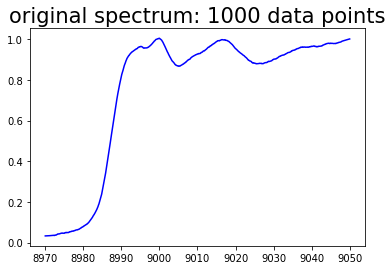

In [166]:
plt.plot(np.linspace(8970, 9050, 1000),ndArray_100_evely_spaced_elements[0],color = 'blue')
plt.title("original spectrum: 1000 data points", fontsize =21)

In [168]:
dmu1_ndArray_100_evely_spaced_elements , dmu2_ndArray_100_evely_spaced_elements = xanes_derivatives(pd.DataFrame(ndArray_100_evely_spaced_elements))

In [189]:
dmu1, dmu2 = xanes_derivatives(df_test)

Text(0.5, 1.0, 'choose 1000 points to get the derivative')

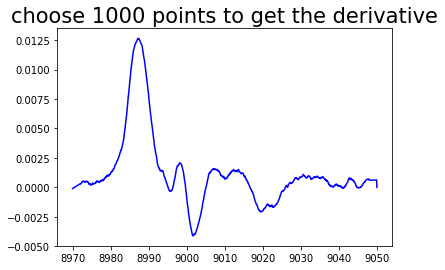

In [190]:
#only choose 100 points to get the derivative
plt.plot(np.linspace(8970, 9050, 1000),dmu1_ndArray_100_evely_spaced_elements[0],color = 'blue')
plt.title('choose 1000 points to get the derivative', fontsize = 21)

In [96]:
import sys
sys.path.append('../PredictXANES')
import normalize_noise_smooth_evenly_select_data
from scipy.signal import savgol_filter

# First method: do savgol_filter twice on original data

In [249]:
smooth_twice_spectrum=smooth_spectra(ndArray_100_evely_spaced_elements , windowSize=101, polynomial=3, datapoints=1000)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Text(0.5, 1.0, 'original spectrum: 1000 data points')

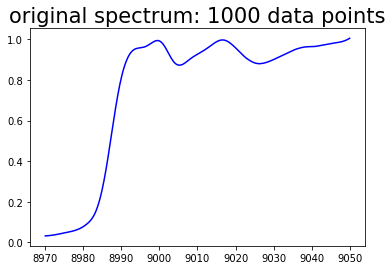

In [250]:
plt.plot(np.linspace(8970, 9050, 1000),smooth_twice_spectrum[0],color = 'blue')
plt.title("original spectrum: 1000 data points", fontsize =21)

In [251]:
dmu1_ndArray_smoothed_twice , dmu2_ndArray_smoothed_twice = xanes_derivatives(pd.DataFrame(smooth_twice_spectrum))

Text(0.5, 1.0, 'derivatives: 1000 points, twice smoothing')

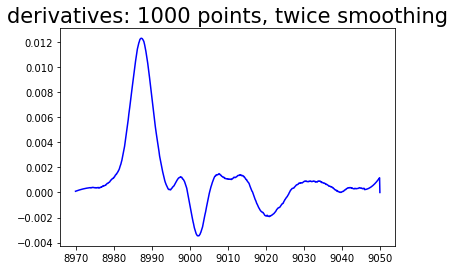

In [252]:
#choose 1000 points to get the derivative
plt.plot(np.linspace(8970, 9050, 1000),dmu1_ndArray_smoothed_twice[0],color = 'blue')
plt.title('derivatives: 1000 points, twice smoothing', fontsize = 21)

In [253]:
dmu1, dmu2 =xanes_derivatives(after_smooth_first500)

In [254]:
from sklearn.preprocessing import MinMaxScaler


In [255]:
dmu1_withoutNoise_1000.shape

(1000,)

Text(0.5, 1.0, 'Derivatives: Without noise(Blue), Smoothed twice(Red)')

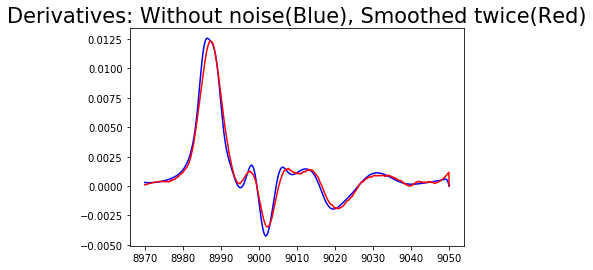

In [256]:
plt.plot(np.linspace(8970, 9050, 1000),dmu1_withoutNoise_1000/10,color = 'blue')

plt.title('choose 1000 points to get the derivative', fontsize = 21)
#only choose 100 points to get the derivative
plt.plot(np.linspace(8970, 9050, 1000),dmu1_ndArray_smoothed_twice[0],color = 'red')
plt.title('Derivatives: Without noise(Blue), Smoothed twice(Red)', fontsize = 21)

In [260]:
# compute R2 with non-noised derivatives and smoothed twice derivatives
r2_score(dmu1_withoutNoise_1000/10, dmu1_ndArray_smoothed_twice[0])

0.9791151191419522

In [203]:
dmu1_withoutNoise[0].shape

(100,)

In [208]:
s1 = UnivariateSpline(np.linspace(8970, 9050, 100), dmu1_withoutNoise[0], s=0)
xs = np.linspace(8970, 9050, 1000)
dmu1_withoutNoise_1000 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
noise = np.random.normal(0,0,1000)

Text(0.5, 1.0, 'Derivatives without noise')

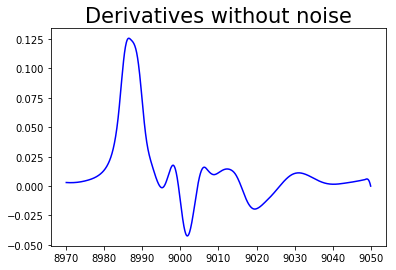

In [269]:
plt.plot(np.linspace(8970, 9050, 1000),dmu1_withoutNoise_1000,color = 'blue')
plt.title('Derivatives without noise', fontsize = 21)

In [265]:
dmu1_ndArray_smoothed_twice.shape

(500, 1000)

In [266]:
GPR_get_CN(features = dmu1_ndArray_smoothed_twice, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.048105025382061746
R Squared Error: 0.7999444014975678


In [267]:
GPR_get_CN(features = dmu1_ndArray_smoothed_twice, labels = np.array(df[:500]['Num Cu']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.048660687388844576
R Squared Error: 0.8701772840934008


In [268]:
GPR_get_CN(features = dmu1_ndArray_smoothed_twice, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.0013391704183531332
R Squared Error: 0.9701803615149809


# 2nd method: do savgol_filter on derivatives

In [97]:
smooth_first_derivative=smooth_spectra(dmu1_ndArray_100_evely_spaced_elements)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


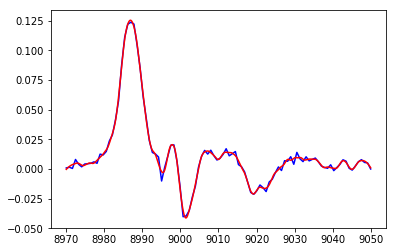

In [164]:
plt.plot(np.linspace(8970, 9050, 100),dmu1_ndArray_100_evely_spaced_elements[0],color = 'blue')
plt.plot(np.linspace(8970, 9050, 1000),smooth_first_derivative[0],color = 'red')

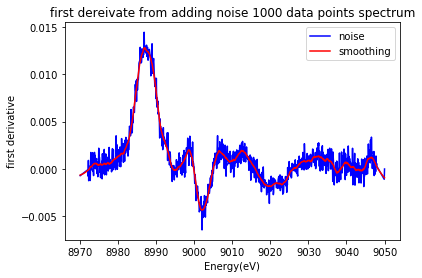

In [99]:
# derivative data with 1000 data point 
# The original spectrum has already been normalized
smoothed_dmu1 = smooth_spectra(dmu1,windowSize=51, polynomial=2, datapoints=1000)
plt.plot(xs,dmu1[0],color = 'blue', label='noise')
plt.plot(xs,smoothed_dmu1[0],color = 'red', label='smoothing')
plt.title('first dereivate from adding noise 1000 data points spectrum')
plt.xlabel('Energy(eV)')
plt.ylabel('first derivative')
plt.legend()
plt.show()

use only the smoothed first derivative data(original spectrum normalized) to predict CN 

In [261]:
smoothed_dmu1.shape

(500, 1000)

In [264]:
GPR_get_CN(features = smoothed_dmu1, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.05567867087181169
R Squared Error: 0.7684476884356064


# We change the std, if we choose a smaller window size the graph will be more zigzag. ???

In [101]:
add_noise_0_05=add_noise(normalization_spectra_first_500_df,std=0.05)
smooth_after_add_noise_0_05 = smooth_spectra(add_noise_0_05, windowSize=99, polynomial=2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [102]:
smooth_after_add_noise_0_05_ws_51 = smooth_spectra(add_noise_0_05, windowSize=51, polynomial=2)

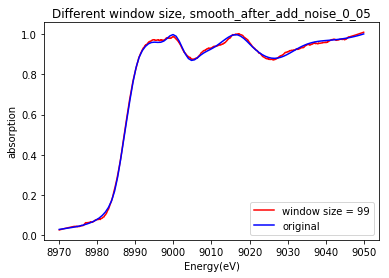

In [103]:
plt.plot(np.linspace(8970, 9050, 1000),smooth_after_add_noise_0_05[0],color = 'red',label = 'window size = 99')
plt.plot(np.linspace(8970, 9050, 100),normalization_spectra_first_500[0],color = 'blue', label = 'original')
#plt.plot(np.linspace(8970, 9050, 1000),smooth_after_add_noise_0_05_ws_51[0],color = 'orange',label = 'window size = 51')
plt.title('Different window size, smooth_after_add_noise_0_05')
plt.xlabel('Energy(eV)')
plt.ylabel('absorption')
plt.legend()
plt.show()

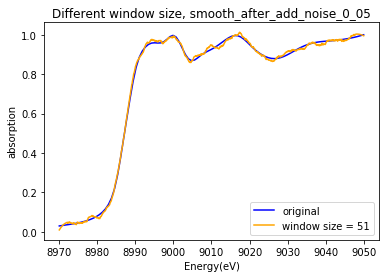

In [104]:
#plt.plot(np.linspace(8970, 9050, 1000),smooth_after_add_noise_0_05[0],color = 'red',label = 'window size = 99')
plt.plot(np.linspace(8970, 9050, 100),normalization_spectra_first_500[0],color = 'blue', label = 'original')
plt.plot(np.linspace(8970, 9050, 1000),smooth_after_add_noise_0_05_ws_51[0],color = 'orange',label = 'window size = 51')
plt.title('Different window size, smooth_after_add_noise_0_05')
plt.xlabel('Energy(eV)')
plt.ylabel('absorption')
plt.legend()
plt.show()

In [105]:
print('std=0.05, R Squared Error between original & smooth:',
      r2_score(one_demension_get_N_evenly_spaced_elements(smooth_after_add_noise_0_05[0],100), normalization_spectra_first_500[0]))

std=0.05, R Squared Error between original & smooth: 0.999565271547134


In [106]:
#get the dmu1, dmu2 from the smoothed spectra which std =0.05 noise data
dmu1_0_05,dmu2_0_05 = xanes_derivatives(pd.DataFrame(smooth_after_add_noise_0_05))

In [107]:
# without smooth the first derivative data std=0.05
GPR_get_CN(features = dmu1_0_05, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.1437794732715425
R Squared Error: 0.40206062985617164


In [108]:
# smooth the first derivative data std=0.05
smooth_dmu1_0_05 = smooth_spectra(dmu1_0_05, windowSize=99, polynomial=2)
print('std=0.05, R Squared Error between original dmu1 & smoothed dmu1:',
      r2_score(smooth_dmu1_0_05[0], dmu1[0]))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


std=0.05, R Squared Error between original dmu1 & smoothed dmu1: 0.900102754263868


In [109]:
GPR_get_CN(features = smooth_dmu1_0_05, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.10620042041640422
R Squared Error: 0.5583415973929361


In [110]:
# if accumulatively do smooth twice on dmu1
twice_smooth_dmu1_0_05 = smooth_spectra(smooth_dmu1_0_05, windowSize=99, polynomial=2)
print('std=0.05, R Squared Error between original dmu1 & smoothed dmu1:',
      r2_score(twice_smooth_dmu1_0_05[0],smooth_dmu1_0_05[0]))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


std=0.05, R Squared Error between original dmu1 & smoothed dmu1: 0.9979191754639511


In [111]:
GPR_get_CN(features = twice_smooth_dmu1_0_05, labels = np.array(df[:500]['CN']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.10563938079602445
R Squared Error: 0.5606748072010013


In [112]:
#original dmu1 without noise 
normalized_without_noise_spectra=normalization_spectra(df[:500].loc[:,'Mu1':'Mu100'])
without_noise_dmu1, without_noise_dmu2 = xanes_derivatives(pd.DataFrame(normalized_without_noise_spectra))

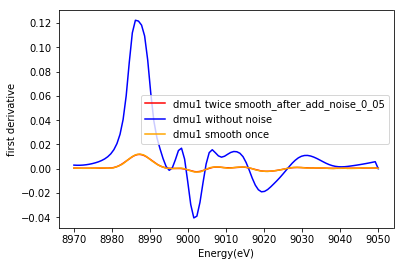

In [113]:
plt.plot(np.linspace(8970, 9050, 1000),twice_smooth_dmu1_0_05[0],color = 'red',label = 'dmu1 twice smooth_after_add_noise_0_05')
plt.plot(np.linspace(8970, 9050, 100),without_noise_dmu1[0],color = 'blue', label = 'dmu1 without noise')
plt.plot(np.linspace(8970, 9050, 1000),smooth_dmu1_0_05[0],color = 'orange',label = 'dmu1 smooth once')
plt.xlabel('Energy(eV)')
plt.ylabel('first derivative')
plt.legend()
plt.show()

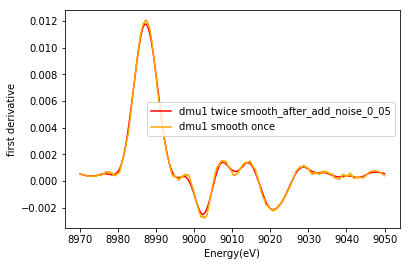

In [114]:
plt.plot(np.linspace(8970, 9050, 1000),twice_smooth_dmu1_0_05[0],color = 'red',label = 'dmu1 twice smooth_after_add_noise_0_05')
plt.plot(np.linspace(8970, 9050, 1000),smooth_dmu1_0_05[0],color = 'orange',label = 'dmu1 smooth once')
plt.xlabel('Energy(eV)')
plt.ylabel('first derivative')
plt.legend()
plt.show()

After smooth dmu2, the R2 improved a lot, but still smaller than 0.5

In [115]:
# only use after smooth dmu2 std = 0.05, windowsize =99 
smooth_dmu2_0_05 = smooth_spectra(dmu2_0_05, windowSize=99, polynomial=2)
GPR_get_CN(features = smooth_dmu2_0_05, labels = np.array(df[:500]['CN']))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
0.1512819134327692
R Squared Error: 0.37086004021377283
